# Toxic comments analysis

In [56]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


*Russian language toxic comments dataset

In [57]:
df=pd.read_csv(r'C:\Users\Admin\OneDrive\Рабочий стол\DataScience\labeled.csv', sep=',')


In [58]:
df.shape

(14412, 2)

There are featured 14412 rows and 2 columns

In [59]:
df.head(10)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
5,Для каких стан является эталоном современная с...,1.0
6,В шапке были ссылки на инфу по текущему фильму...,0.0
7,УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...,1.0
8,"Ебать тебя разносит, шизик.\n",1.0
9,"Обосрался, сиди обтекай\n",1.0


Now it will be inverted into integer type

In [60]:
df['toxic'] = df['toxic'].apply(int)

In [61]:
df.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1


In [62]:
df['toxic'].value_counts()

0    9586
1    4826
Name: toxic, dtype: int64

Here we can see that normal comments exceed toxic ones

see data markup quality

In [63]:
for c in df[df["toxic"] == 1]["comment"].head(5):
    print(c)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)



There are presented negative comments

In [64]:
for c in df[df['toxic'] == 0]['comment'].head(5):
    print(c)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

As we can see here that there are neutral comments however some websites links were deemed as normal comments.  

Let's take approximately 500 samples for data analysis 

In [65]:
train_df, test_df = train_test_split(df,test_size = 500)

In [66]:
test_df.shape

(500, 2)

In [67]:
test_df['toxic'].value_counts()

0    332
1    168
Name: toxic, dtype: int64

In [68]:
train_df['toxic'].value_counts()

0    9254
1    4658
Name: toxic, dtype: int64

Now we are ready to prepare our data for analysis:
1)First of all, we will split the text into tokens
2)Secondly, we will delete words that don't carry semantic load
3)Finally, do the 'stemming' of words. The stemming process is deleting endings of words and to lead them to lower case.

In [70]:
sentence_example =df.iloc[1]['comment']
tokens = word_tokenize(sentence_example, language='russian')
tokens_without_punctuation=[i for i in tokens if i not in string.punctuation]
russian_stop_words = stopwords.words('russian')
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
snowball = SnowballStemmer(language = 'russian')
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]


In [71]:
print(f'Original text:{sentence_example}')
print(f'Tokens:{tokens}')
print(f'Tokens_without_punctuation:{tokens_without_punctuation}')
print(f'Tokens_without_stop_words_and_punctuation:{tokens_without_stop_words_and_punctuation}')
print(f'Stemmed_tokens:{stemmed_tokens}')
      

Original text:Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Tokens:['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
Tokens_without_punctuation:['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']
Tokens_without_stop_words_and_punctuation:['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'хохлов', 'хуже', 'Если', 'хохлов', 'кисель', 'придумал']
Stemmed_tokens:['хохл', 'эт', 'отдушин', 'затюкан', 'россиянин', 'мол', 'вон', 'хохл', 'хуж', 'есл', 'хохл', 'кисел', 'придума']


Now we are creating a function  for every single comment in our dataset testing  

In [75]:
snowball = SnowballStemmer(language='russian')
russian_stop_words = stopwords.words('russian')

def tokenize_sentence(sentence:str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language = 'russian')
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

Create a vectorizer

In [76]:
vectorizer = TfidfVectorizer(tokenizer = lambda x: tokenize_sentence(x, remove_stop_words = True))

Let's train the created vectorizer

In [77]:
features = vectorizer.fit_transform(train_df['comment'])

The model is ready and it is high time to train a logistic regression 

In [78]:
model = LogisticRegression(random_state = 0)
model.fit(features, train_df['toxic'])

LogisticRegression(random_state=0)

The model has been trained. Let's check this out!

In [79]:
model.predict(features[0])
train_df['comment'].iloc[0]

'это что за система такая ультимативная?)\n'

However, it is inconvenient to use the model I presented above. There is 'Pipeline' that allows merging 'features' and 'model' together.

In [86]:
model_pipeline = Pipeline([('vectorizer', TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))), \
                          ('model', LogisticRegression(random_state=0))])


In [87]:
model_pipeline.fit(train_df['comment'], train_df['toxic'])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000002A078CCC160>)),
                ('model', LogisticRegression(random_state=0))])

Our new model is ready for employment! Let's try it out 

In [88]:
model_pipeline.predict(['Я люблю Чехию!'])

array([0], dtype=int64)

I have just written that 'I love Czech Republic' and model responded me that it is a positive comment.


Let's try to write a negative comment to the model!

In [89]:
model_pipeline.predict(['Пусть все кошки в Чехии здохнут к чертовой бабушке!'])

array([1], dtype=int64)

I have just written abovethat 'Let all the cats in the Czech Republic die to hell!'

As we can observe that the model immediately reacted and defined it as a negative comment

But it is highly important to determine the quality of the model. Two important indicators are 'precision' and 'recall'

In [91]:
precision_score(y_true = test_df['toxic'], y_pred = model_pipeline.predict(test_df['comment']))

0.9007633587786259

In [92]:
recall_score(y_true = test_df['toxic'], y_pred = model_pipeline.predict(test_df['comment']))

0.7023809523809523

*We have just got results of both 'precision' and 'recall': 0,90 and 0.70. We must get a model where the precision will be at least 0,95.
*The model gets back 'possibility' and afterward it compares 'possibility' with 'thresholds'. If 'possibility' is higher than 'thresholds' it will get back 1 and vice versa 0.
*Changing 'threshold' we are able to improve 'precision' and 'recall'

In [97]:
prec, rec, thresholds = precision_recall_curve(y_true = test_df['toxic'], probas_pred=model_pipeline.predict_proba(test_df['comment'])[:,1])

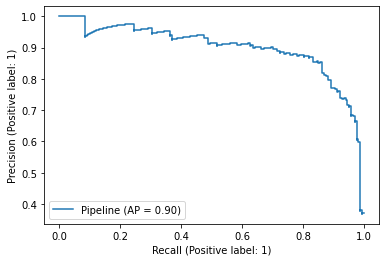

In [98]:
plot_precision_recall_curve(estimator=model_pipeline, X = test_df['comment'], y=test_df['toxic'])

Let's find a 'precision' more than 0,95

In [100]:
np.where(prec > 0.95)

(array([389, 390, 391, 392, 400, 401, 402, 403, 404, 405, 406, 407, 408,
        409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,
        422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 439, 440,
        441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453],
       dtype=int64),)

In [101]:
thresholds[389]

0.7299368023550374

Let's call precision with this threshold (389)

In [102]:
precision_score(y_true = test_df['toxic'], y_pred = model_pipeline.predict_proba(test_df['comment'])[:, 1] > thresholds[389])

0.9523809523809523

That is what we needed for precision !

In [103]:
recall_score(y_true = test_df['toxic'], y_pred = model_pipeline.predict_proba(test_df['comment'])[:, 1] > thresholds[389])

0.35714285714285715

'Recall' became lower what it means that we are able to improve our model much better.

Let's make our model much smarter by means of increasing regularization factor up to 10 (according to documentation)

In [110]:
model_pipeline_c10 = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=lambda x:tokenize_sentence(x, remove_stop_words=True))),
    ('model',LogisticRegression(random_state=0, C=10.))
]
)

In [111]:
model_pipeline_c10.fit(train_df['comment'], train_df['toxic'])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000002A078CCCDC0>)),
                ('model', LogisticRegression(C=10.0, random_state=0))])

In [112]:
prec_c10, rec_c10, thresholds_c10 = precision_recall_curve(y_true = test_df['toxic'], probas_pred=model_pipeline_c10.predict_proba(test_df['comment'])[:,1])

In [113]:
np.where(prec_c10 > 0.95)

(array([414, 415, 416, 435, 436, 460, 461, 462, 463, 464, 465, 466, 467,
        468, 469, 470, 471, 472, 473, 474, 475, 476, 477], dtype=int64),)

In [115]:
precision_score(y_true = test_df['toxic'], y_pred = model_pipeline_c10.predict_proba(test_df['comment'])[:, 1] > thresholds_c10[414])

0.9516129032258065

In [116]:
recall_score(y_true = test_df['toxic'], y_pred = model_pipeline_c10.predict_proba(test_df['comment'])[:, 1] > thresholds_c10[414])

0.35119047619047616

To sum it up. We came off to increase 'precision' from 0.90 up to 0.95 and we decreased recall score from 70 up to 35. We sacrificed 'recall' in favor of 'precision'.  